In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

Welcome to JupyROOT 6.22/02


Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<int> already in TClassTable
Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<float> already in TClassTable


In [2]:
folder="${fastMCKalmanOptTesting}/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
foldercheck=folder+"Covariance/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


In [3]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("Unit0MC","(p0In-p0MC)/sqrt(part.fParamIn[1].fC[0])")
tree.SetAlias("Unit1MC","(p1In-p1MC)/sqrt(part.fParamIn[1].fC[2])")
tree.SetAlias("Unit2MC","(p2In-p2MC)/sqrt(part.fParamIn[1].fC[5])")
tree.SetAlias("Unit3MC","(p3In-p3MC)/sqrt(part.fParamIn[1].fC[9])")
tree.SetAlias("Unit4MC","(p4In-p4MC)/sqrt(part.fParamIn[1].fC[14])")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31")
#part.fStatusMaskIn.fData[1]==31

True

# Testing the M distances between the parameters

## First the whole matrix

In [4]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
hDistance   = ROOT.TH1D( 'hDistance', 'Distance', 200, 0,25 )


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    if(tree.part.fStatusMaskIn[1]!=31): continue
    C=[]
    xMC=[]
    xSeed=[]

    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 
        #print(tree.part.fParamIn[1].GetCovariance()[i])

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])

    
    #print(S)
    Sinv = np.linalg.inv(S)

    c = distance.mahalanobis(xMC,xSeed,Sinv)
    hDistance.Fill(c*c)
 
    

 FCN=113.728 FROM MIGRAD    STATUS=CONVERGED      50 CALLS          51 TOTAL
                     EDM=9.24691e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.93689e+00   2.78215e-02   1.45503e-04   4.33028e-04
   2  p1           1.23781e+03   1.24505e+01   6.51156e-02  -5.10823e-07


Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman.png has been created


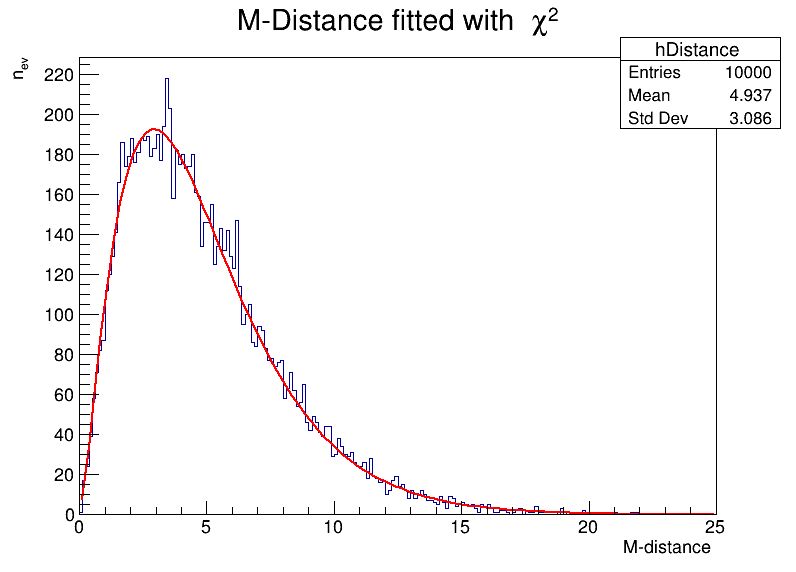

In [5]:
formula = "[1]*ROOT::Math::chisquared_pdf(x,[0])"
fchi2 = ROOT.TF1("fchi2",formula,0,25)
fchi2.SetParameters(5,10000)
  
hd = ROOT.TCanvas("hd","hd",800,600)
hDistance.SetTitle("M-Distance fitted with #chi^{2};M-distance;n_{ev}")
#fchi2.Draw()
hDistance.Draw()
hDistance.Fit("fchi2")

hd.Draw()
save=foldercheck+"MDistanceKalman"+".png"
hd.Print(save)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/QQplotKalman.png has been created


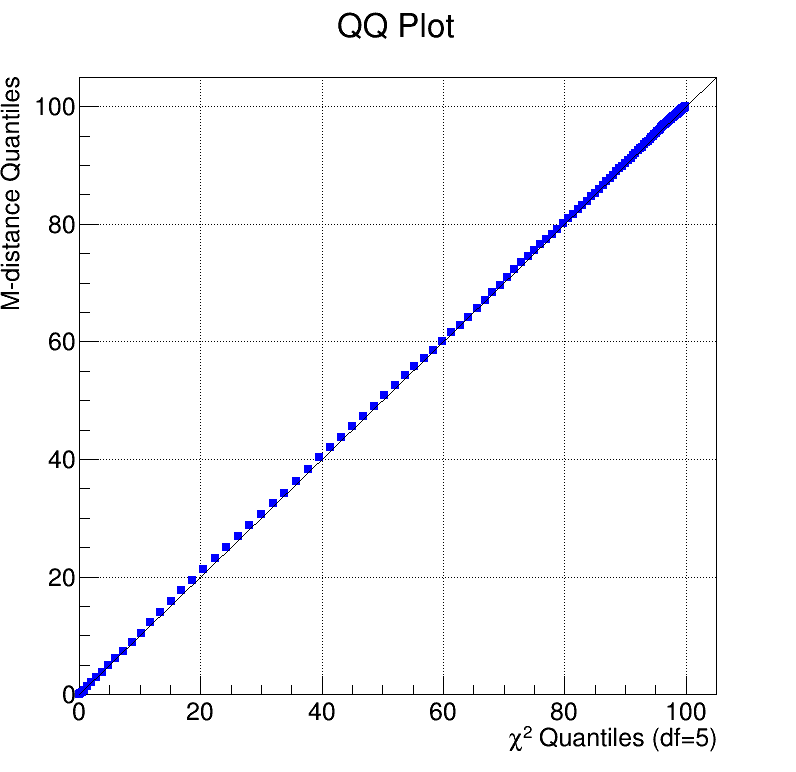

In [6]:
M_distance = array('d')
chi2_quant = array('d')

for b in range (1,hDistance.GetNbinsX()+1):
    edge = hDistance.GetBinLowEdge(b+1)
    quant = chi2.cdf(edge, 5) * 100
    integ = hDistance.Integral(1,b) / hDistance.GetEntries() * 100
    chi2_quant.append(quant)
    M_distance.append(integ)

QQ_graph = ROOT.TGraph(len(chi2_quant),chi2_quant,M_distance)

hq = ROOT.TCanvas("hq","hq",800,800)
hq.SetGrid()
QQ_graph.SetTitle("QQ Plot;#chi^{2} Quantiles (df=5);M-distance Quantiles")
QQ_graph.SetMarkerColor(4)
QQ_graph.SetMarkerSize(1)
QQ_graph.SetMarkerStyle(21)
QQ_graph.GetXaxis().SetLimits(0.,105.)                 # along X
QQ_graph.GetHistogram().SetMaximum(105.)   # along          
QQ_graph.GetHistogram().SetMinimum(0.)  #   Y
#fchi2.Draw()
l = ROOT.TLine(0.0,0.0,105,105)

QQ_graph.Draw("AP")
l.Draw("same")


hq.Draw()
save=foldercheck+"QQplotKalman"+".png"
hq.Print(save)


## Now pair by pair

 FCN=99.3449 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=3.12898e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.95651e+00   1.62075e-02   7.92620e-05  -4.49803e-03
   2  p1           1.23997e+03   1.24640e+01   6.09531e-02   2.35552e-06
 FCN=97.191 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=6.81885e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.96070e+00   1.64102e-02   7.93883e-05  -2.18661e-03
   2  p1           1.24072e+03   1.24700e+01   6.03253e-02   6.50078e-07
 FCN=93.9462 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=4.443

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_01.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_02.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_12.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_03.png has been created
Info in <TCanvas::Print>

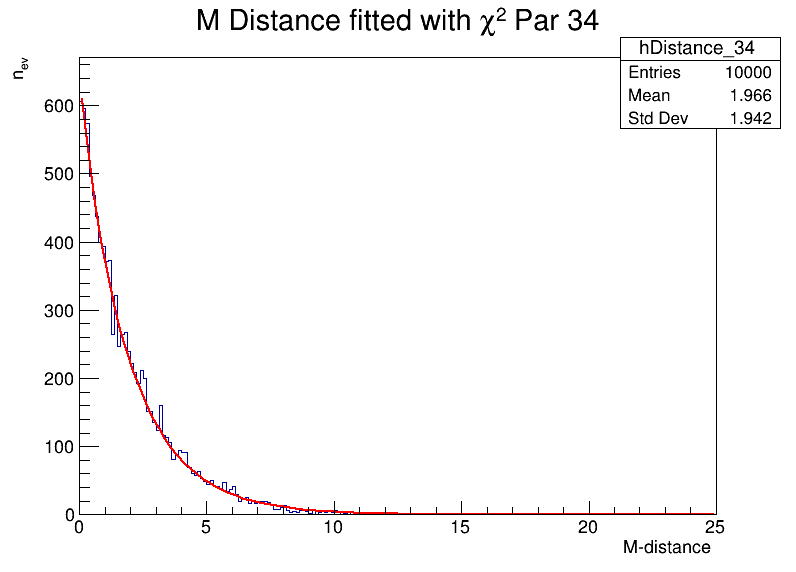

In [7]:
harray = []

for xx in range (5):
    for yy in range (xx):
        name = 'hDistance_'+str(yy)+str(xx)
        hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
        harray.append(hDistance)



for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    if(tree.part.fStatusMaskIn[1]!=31): continue
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
        for yy in range (xx):
            #print(yy,xx)
            S2 = np.array([[S[yy][yy],S[yy][xx]],
                           [S[xx][yy],S[xx][xx]]])
            #print(S2)

            xMC2 = [xMC[yy],xMC[xx]] 

            #print(xMC2)

            xSeed2 = [xSeed[yy],xSeed[xx]]

            #print(xSeed2)

            Sinv2 = np.linalg.inv(S2)

            c = distance.mahalanobis(xMC2,xSeed2,Sinv2)
            #print(harray[arraycounter])
            harray[arraycounter].Fill(c*c)
            arraycounter+=1

arraycounter = 0
for xx in range (5):
    for yy in range (xx):
        #print(harray[arraycounter])
        fname="fchi2_"+str(yy)+str(xx)
        fchi2_2 = ROOT.TF1(fname,formula,0,15)
        fchi2_2.SetParameters(5,10000)

        Canvas = "c_"+str(yy)+str(xx)
        cM = ROOT.TCanvas(Canvas,Canvas,800,600)
        Title = "M Distance fitted with #chi^{2} Par "+str(yy)+str(xx)+";M-distance;n_{ev}"
        harray[arraycounter].SetTitle(Title)
        harray[arraycounter].Draw()
        harray[arraycounter].Fit(fchi2_2)
        cM.Draw()
        save=foldercheck+"MDistanceKalman_"+str(yy)+str(xx)+".png"
        cM.Print(save)
        arraycounter+=1    
   

## Now just excluding one

 FCN=150.864 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=7.54312e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.92427e+00   2.44626e-02   1.47248e-04  -6.24598e-03
   2  p1           1.23297e+03   1.24238e+01   7.47564e-02   9.81525e-05
 FCN=154.016 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=2.39539e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.93275e+00   2.43229e-02   1.47906e-04  -1.43192e-03
   2  p1           1.23257e+03   1.24218e+01   7.55156e-02   5.56633e-05
 FCN=127.341 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=6.86

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no3.png has been created
Info in <TCanvas::Pr

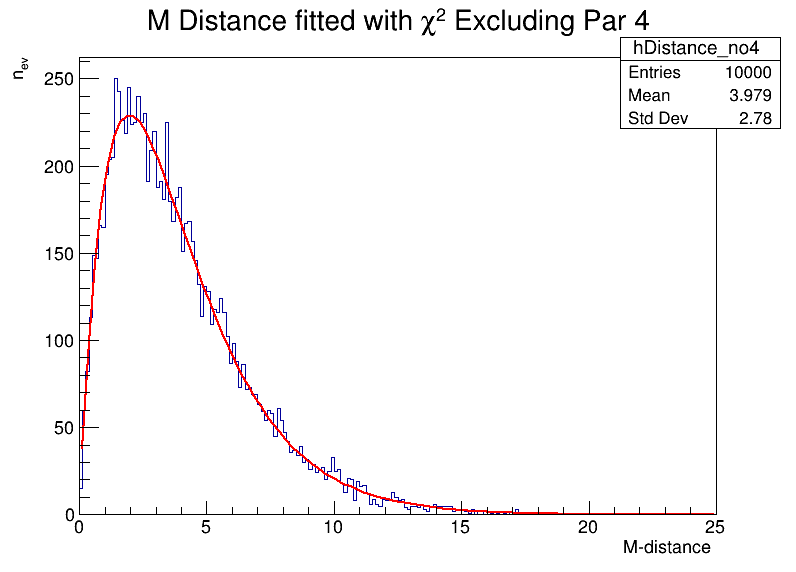

In [8]:
harray = []

for xx in range (5):
    name = 'hDistance_no'+str(xx)
    #print(name)
    hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
    harray.append(hDistance)

        
for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    if(tree.part.fStatusMaskIn[1]!=31): continue
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
    
        #print(xx)
        S4 = []
        xMC4 = []
        xSeed4 = []

        for ii in range (5):
            row = []
            for jj in range (5):
                if(ii!=xx and jj!=xx): 
                    row.append(S[ii][jj])

            if(len(row)!=0): 
                S4.append(row)

            if(ii!=xx):
                xMC4.append(xMC[ii])
                xSeed4.append(xSeed[ii])

        #print(xMC4)
        #print(xSeed4)
        #print(S4)
        
        S4inv =  np.linalg.inv(S4)       
        
        c = distance.mahalanobis(xMC4,xSeed4,S4inv)
        harray[xx].Fill(c*c)
        
for k in range (5):
    fname="fchi2_"+str(k)
    fchi2_4 = ROOT.TF1(fname,formula,0,15)
    fchi2_4.SetParameters(4,1000)

    Canvas = "c_"+str(k)
    cM = ROOT.TCanvas(Canvas,Canvas,800,600)
    Title = "M Distance fitted with #chi^{2} Excluding Par "+str(k)+";M-distance;n_{ev}"
    harray[k].SetTitle(Title)
    harray[k].Draw()
    harray[k].Fit(fchi2_4)
    cM.Draw()
    save=foldercheck+"MDistanceKalman_no"+str(k)+".png"
    cM.Print(save)
   


# Diagonal elements unit test

 FCN=80.0014 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=2.0313e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.23593e+02   3.99569e+00   1.42777e-02   1.47193e-05
   2  Mean         4.82345e-03   9.89113e-03   4.34596e-05   4.14462e-03
   3  Sigma        9.79389e-01   7.11919e-03   8.64609e-06   1.79540e-02
 FCN=88.8053 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=5.22061e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.18749e+02   3.93569e+00   1.48156e-02   2.41508e-04
   2  Mean        -2.66565e-03   1.00129e-02   4.63318e-05  -6.34771e-02
   3  Sigma        9.93018e-01   7

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalm

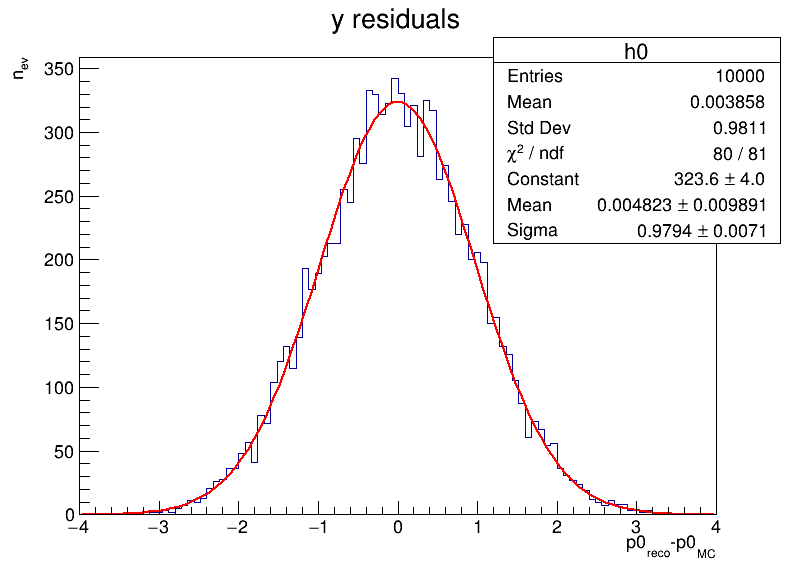

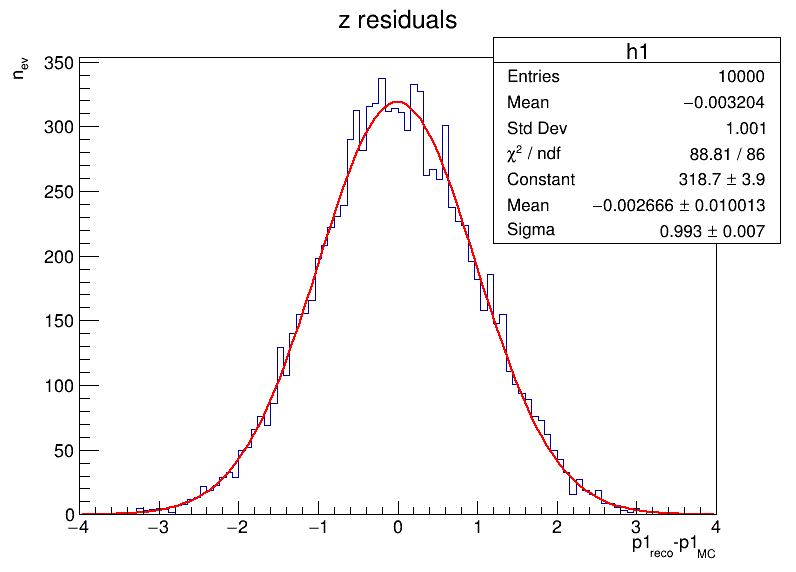

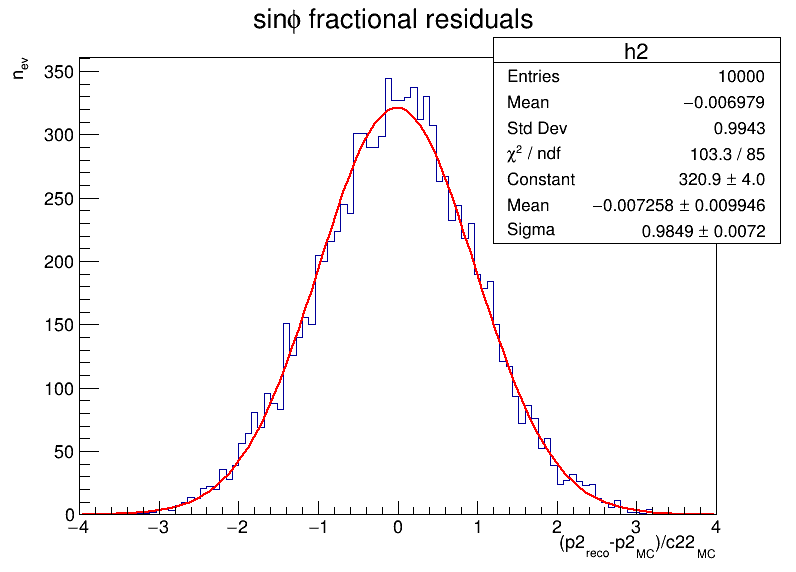

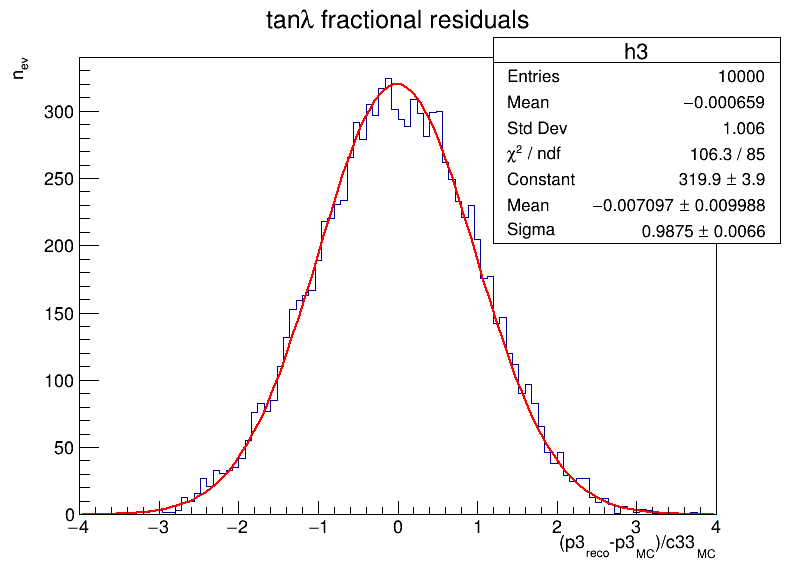

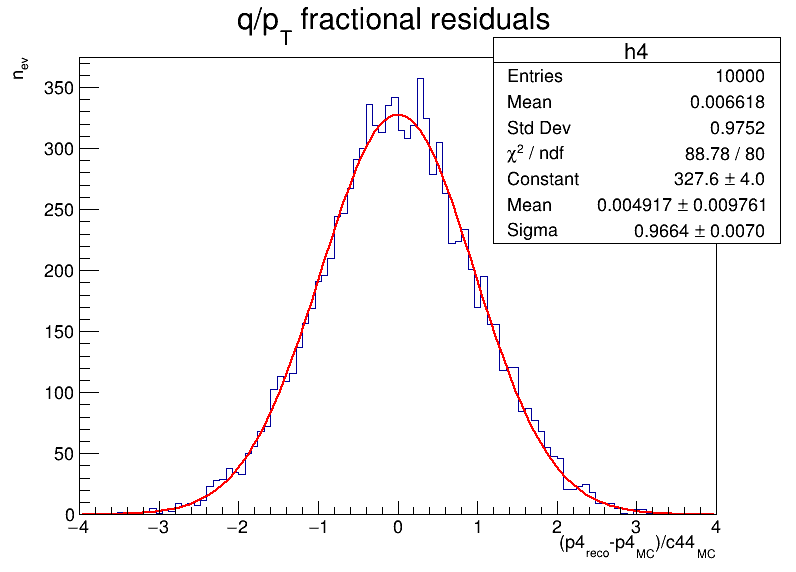

In [9]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
tree.Draw("Unit0MC>>h0(100,-4,4)","isOK")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"UnitK_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
tree.Draw("Unit1MC>>h1(100,-4,4)","isOK")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"UnitK_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
tree.Draw("Unit2MC>>h2(100,-4,4)","isOK")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"UnitK_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
tree.Draw("Unit3MC>>h3(100,-4,4)","isOK")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"UnitK_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
tree.Draw("Unit4MC>>h4(100,-4,4)","isOK")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"UnitK_p4"+".png"
ch4.Print(save)

In [10]:
a = np.array([[1,0,0,0,0],
              [0,1,0,0,0],
              [0,0,-1,0,0],
              [0,0,0,-1,0],
              [0,0,0,0,-1]])
b = np.array([[1,1,1,1,1],
              [1,1,1,1,1],
              [1,1,1,1,1],
              [1,1,1,1,1],
              [1,1,1,1,1]]) 
c = np.matmul(a,b)
np.matmul(c,a.transpose())

array([[ 1,  1, -1, -1, -1],
       [ 1,  1, -1, -1, -1],
       [-1, -1,  1,  1,  1],
       [-1, -1,  1,  1,  1],
       [-1, -1,  1,  1,  1]])